# Trabalho 01

### 1. Especificação do Problema

O objetivo deste trabalho é implementar alguns filtros de imagens no domı́nio espacial e de frequências. A
filtragem aplicada a uma imagem digital é uma operação local que altera os valores de intensidade dos pixels
da imagem levando-se em conta tanto o valor do pixel em questão quanto valores de pixels vizinhos.
No processo de filtragem, utiliza-se uma operação de convolução de uma máscara pela imagem. Este
processo equivale a percorrer toda a imagem alterando seus valores conforme os pesos da máscara e as
intensidades da imagem.

In [1]:
# importacao das bibliotecas utilizadas
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity
from scipy.ndimage import gaussian_filter
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importacao das imagens
baboon = cv2.imread('imgs/baboon.png',cv2.IMREAD_GRAYSCALE)
butterfly = cv2.imread('imgs/butterfly.png',cv2.IMREAD_GRAYSCALE)

### 1.1 Filtragem no Domı́nio Espacial

In [3]:
h1 = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
h2 = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]]) * (1.0/256.0)
h3 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
h4 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

In [4]:
def generate_padding(img,size,value):
    output = cv2.copyMakeBorder(img,size,size,size,size,cv2.BORDER_CONSTANT,value=value)
    return output

In [5]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    padding = m // 2
    image = generate_padding(image,padding,0)
    kernel_180 = np.rot90(kernel,2)
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel_180)
    output = rescale_intensity(new_image, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    return output

In [6]:
def rescale(image):
    output = rescale_intensity(image, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    return output

In [7]:
def plotting_image_and_conv(image,conv):
    f = plt.figure(figsize=(10,5))
    
    f.add_subplot(1,2,1)
    plt.imshow(image,'gray')
    
    f.add_subplot(1,2,2)
    plt.imshow(conv,'gray')
    
    plt.show()

In [8]:
baboon_output_h1 = convolution2d(baboon,h1)
baboon_output_h2 = convolution2d(baboon,h2)
baboon_output_h3 = convolution2d(baboon,h3).astype('uint32')
baboon_output_h4 = convolution2d(baboon,h4).astype('uint32')
baboon_output_h = rescale(np.sqrt((baboon_output_h3 * baboon_output_h3) + (baboon_output_h4 * baboon_output_h4)))

In [9]:
butterfly_output_h1 = convolution2d(butterfly,h1)
butterfly_output_h2 = convolution2d(butterfly,h2)
butterfly_output_h3 = convolution2d(butterfly,h3).astype('uint32')
butterfly_output_h4 = convolution2d(butterfly,h4).astype('uint32')
butterfly_output_h = rescale(np.sqrt((butterfly_output_h3 * butterfly_output_h3) + (butterfly_output_h4 * butterfly_output_h4)))

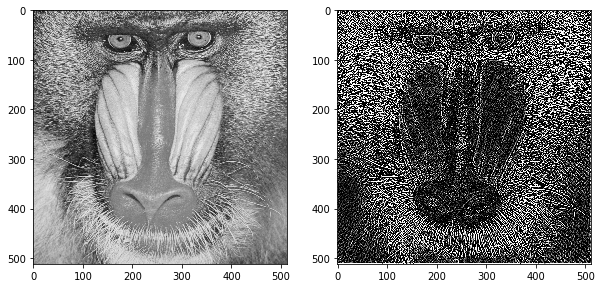

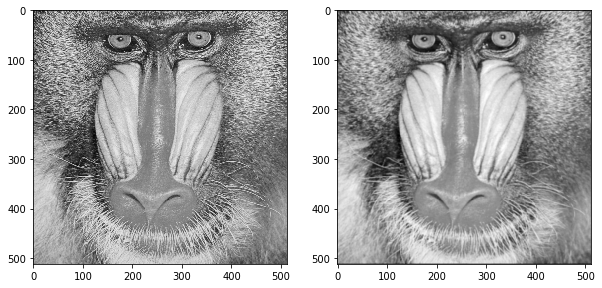

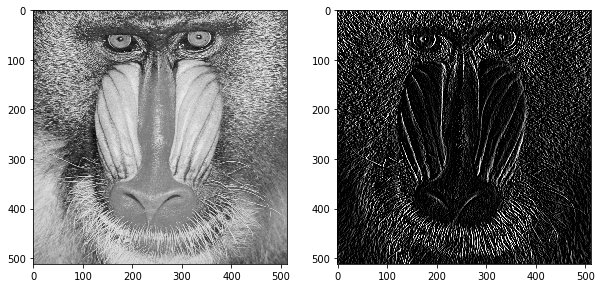

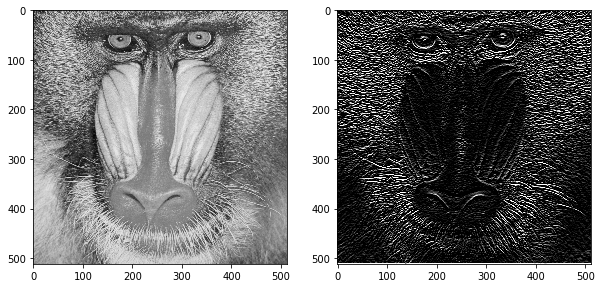

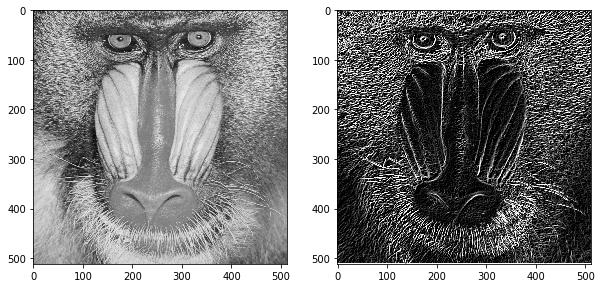

In [10]:
# resultados da aplicacao dos filtros na imagem baboon
plotting_image_and_conv(baboon,baboon_output_h1)
plotting_image_and_conv(baboon,baboon_output_h2)
plotting_image_and_conv(baboon,baboon_output_h3)
plotting_image_and_conv(baboon,baboon_output_h4)
plotting_image_and_conv(baboon,baboon_output_h)

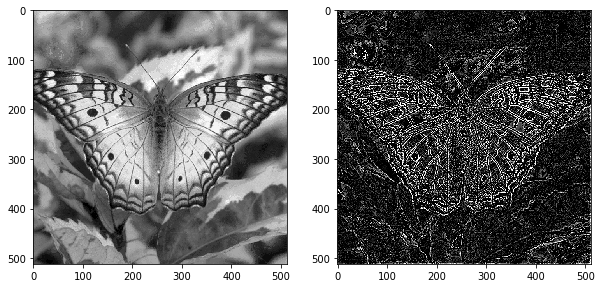

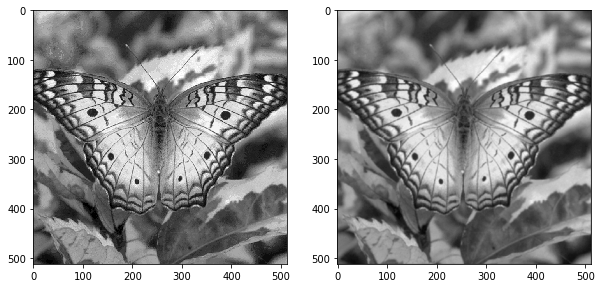

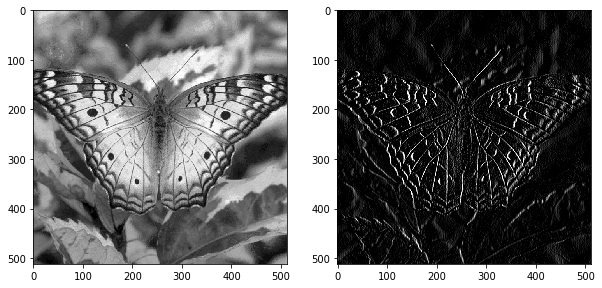

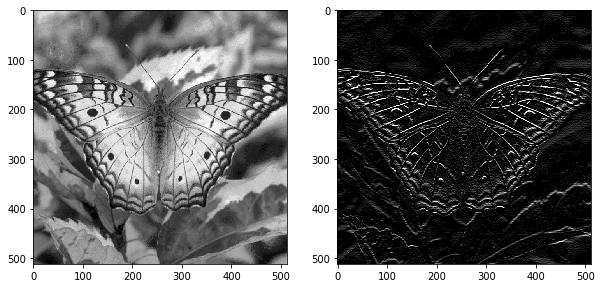

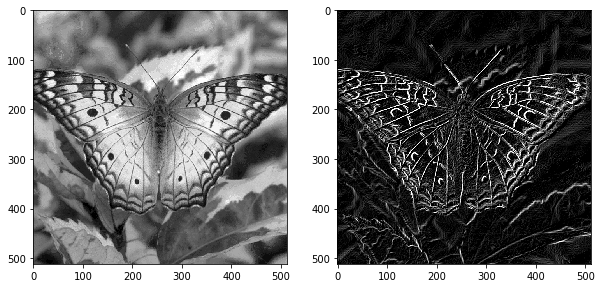

In [11]:
# resultados da aplicacao dos filtros na imagem baboon
plotting_image_and_conv(butterfly,butterfly_output_h1)
plotting_image_and_conv(butterfly,butterfly_output_h2)
plotting_image_and_conv(butterfly,butterfly_output_h3)
plotting_image_and_conv(butterfly,butterfly_output_h4)
plotting_image_and_conv(butterfly,butterfly_output_h)

In [12]:
# salvando os resultados
plt.imsave('resultados/baboon_h1.png',baboon_output_h1,cmap='gray')
plt.imsave('resultados/baboon_h2.png',baboon_output_h2,cmap='gray')
plt.imsave('resultados/baboon_h3.png',baboon_output_h3,cmap='gray')
plt.imsave('resultados/baboon_h4.png',baboon_output_h4,cmap='gray')
plt.imsave('resultados/baboon_h.png',baboon_output_h,cmap='gray')

plt.imsave('resultados/butterfly_h1.png',butterfly_output_h1,cmap='gray')
plt.imsave('resultados/butterfly_h2.png',butterfly_output_h2,cmap='gray')
plt.imsave('resultados/butterfly_h3.png',butterfly_output_h3,cmap='gray')
plt.imsave('resultados/butterfly_h4.png',butterfly_output_h4,cmap='gray')
plt.imsave('resultados/butterfly_h.png',butterfly_output_h,cmap='gray')

### 1.2 Filtragem no Domı́nio de Frequências

In [13]:
def generate_gaussian_filter(kernellen=5, sigma=1):
    gkern1d = signal.gaussian(kernellen, std=sigma).reshape(kernellen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    total = np.sum(gkern2d)
    output = gkern2d / total
    return output

In [14]:
def fourier_transform(image):
    dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(np.abs(dft_shift))
    return magnitude_spectrum,dft_shift

In [15]:
def inverse_fourier_transform(dft):
    f_ishift = np.fft.ifftshift(dft)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    return img_back

In [16]:
def fourier(image,sigma=1):
    mag, dft = fourier_transform(image)
    rows, cols = mag.shape[0],mag.shape[1]
    gaussian_filter = generate_gaussian_filter(rows,sigma)
    mask = np.zeros((rows,cols,2))
    mask[:,:,0] = gaussian_filter
    mask[:,:,1] = gaussian_filter
    fshift = dft * mask
    magnitude_spectrum = np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1])+1)
    inv_image = inverse_fourier_transform(fshift)
    return mag[:,:,0], gaussian_filter, magnitude_spectrum, inv_image

In [17]:
def plotting_images_fourier(mag,gaussian_filter,magnitude_spectrum,inv_image):
    f = plt.figure(figsize=(10,10))
    
    f.add_subplot(2,2,1)
    plt.imshow(mag,'gray')
    plt.title('Espectro de magnitude')
    
    f.add_subplot(2,2,2)
    plt.imshow(gaussian_filter,'gray')
    plt.title('Filtro gaussiano')
    
    f.add_subplot(2,2,3)
    plt.imshow(magnitude_spectrum,'gray')
    plt.title('Filtro gaussiano no espectro de magnitude')
    
    f.add_subplot(2,2,4)
    plt.imshow(inv_image,'gray')
    plt.title('Resultado final')
    
    plt.show()

In [18]:
sigmas = [2,4,8,16,32,64]

In [19]:
def diversify_sigma_and_save(image,sigmas,name):
    for sig in sigmas:
        print('Sigma: ' + str(sig))
        mag,gaussian_filter,magnitude_spectrum,inv_image = fourier(image,sig)
        
        plotting_images_fourier(mag,gaussian_filter,magnitude_spectrum,inv_image)
        
        plt.imsave('resultados/' + name + '_mag_spec_' + str(sig) + '.png',mag,cmap='gray')
        plt.imsave('resultados/' + name + '_gau_filter_' + str(sig) + '.png',gaussian_filter,cmap='gray')
        plt.imsave('resultados/' + name + '_mag_filter_' + str(sig) + '.png',magnitude_spectrum,cmap='gray')
        plt.imsave('resultados/' + name + '_result_' + str(sig) + '.png',inv_image,cmap='gray')

Sigma: 2


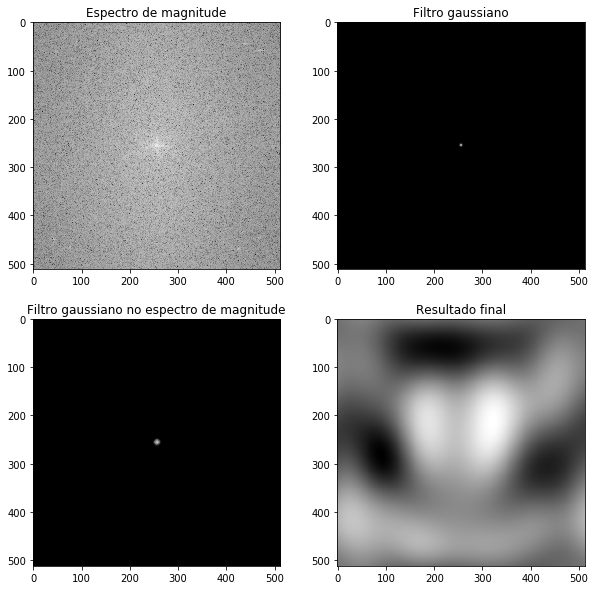

Sigma: 4


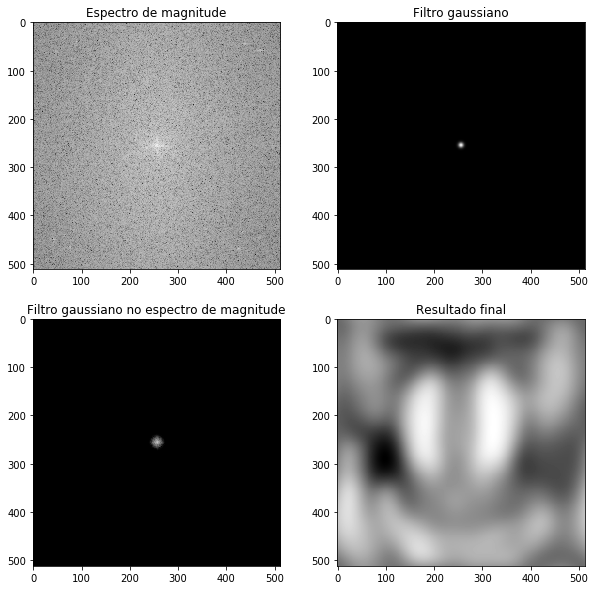

Sigma: 8


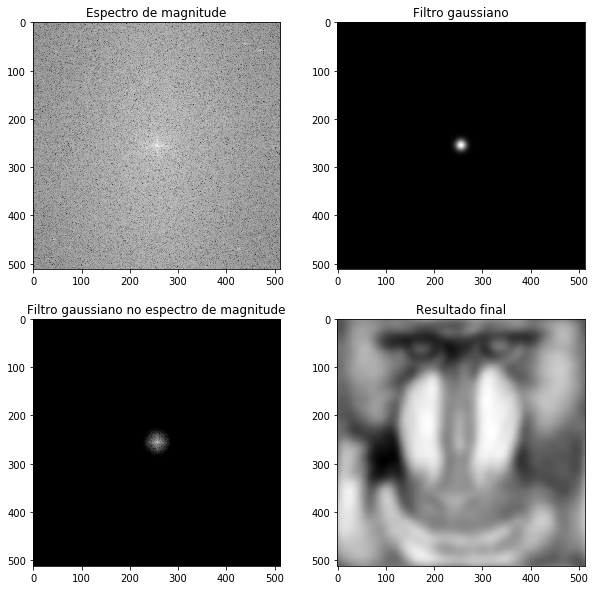

Sigma: 16


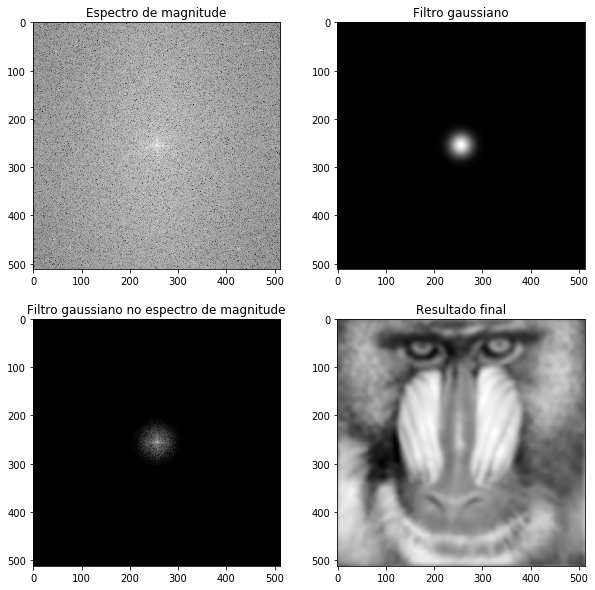

Sigma: 32


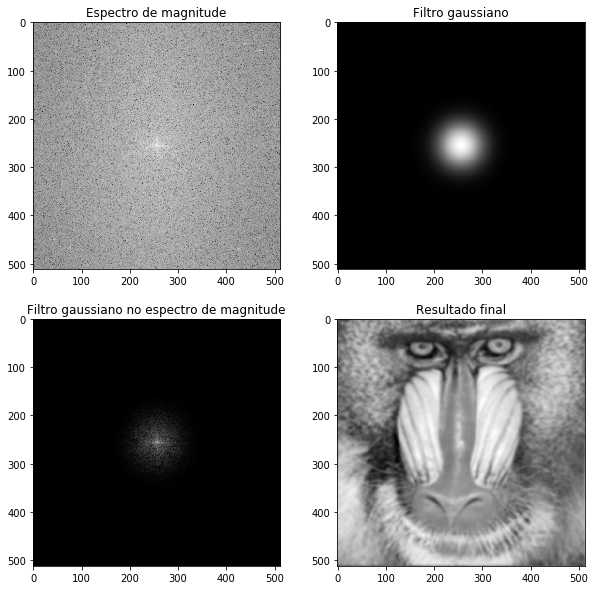

Sigma: 64


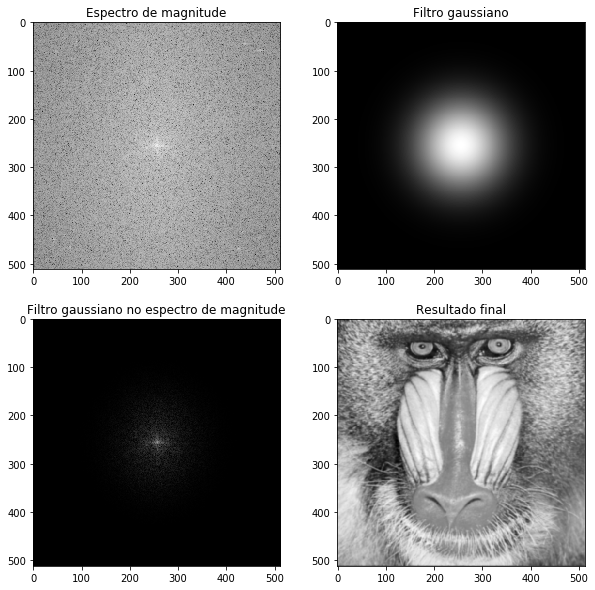

In [20]:
# Resultado com a imagem baboon
diversify_sigma_and_save(baboon,sigmas,'baboon')

Sigma: 2


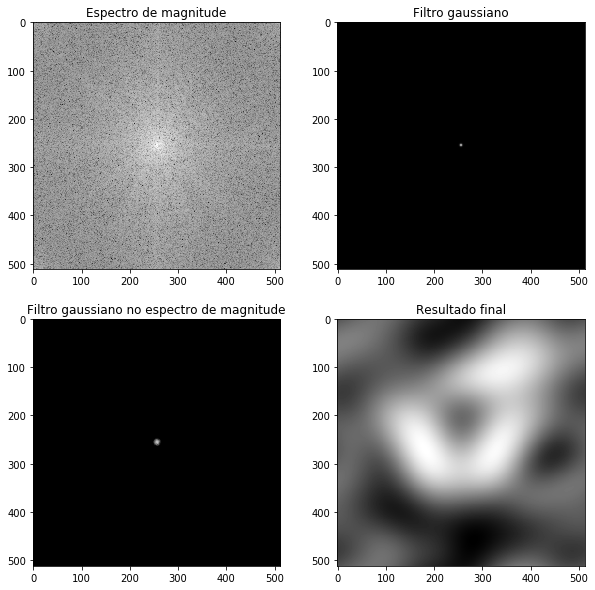

Sigma: 4


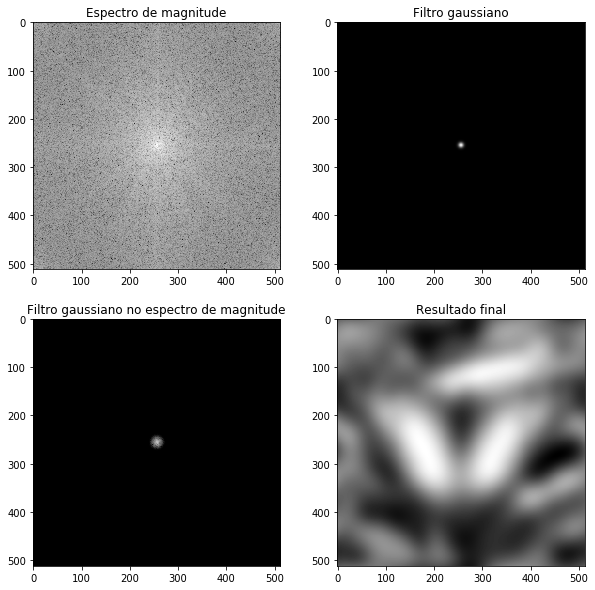

Sigma: 8


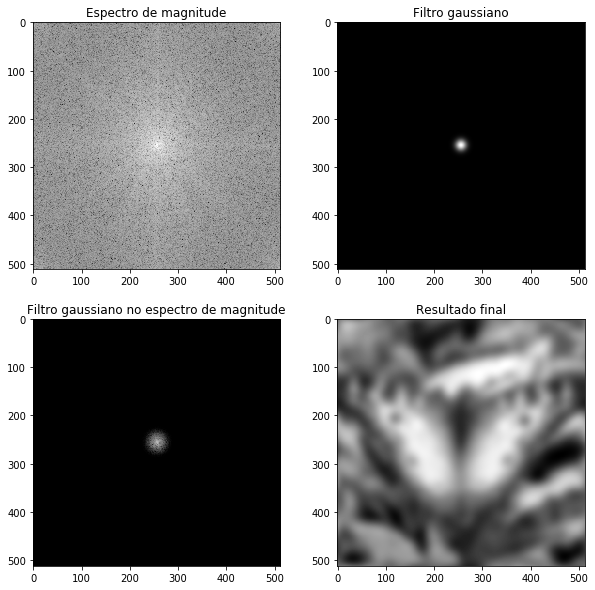

Sigma: 16


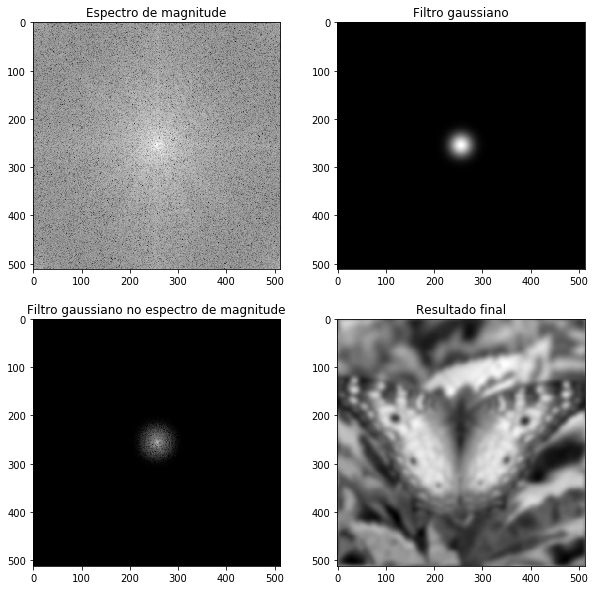

Sigma: 32


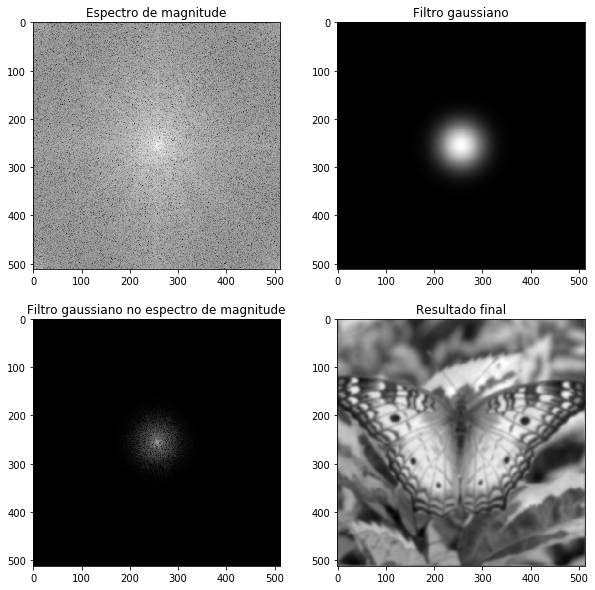

Sigma: 64


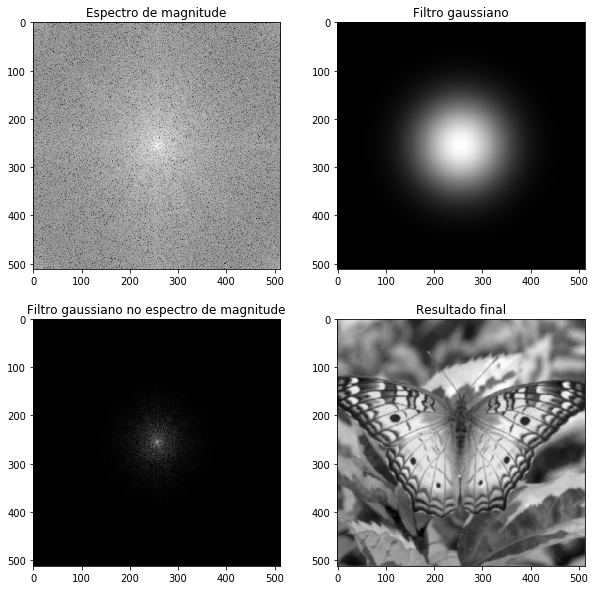

In [21]:
# Resultado com a imagem butterfly
diversify_sigma_and_save(butterfly,sigmas,'butterfly')